In [ ]:
!pip install tsfresh

In [ ]:
!pip install pyts

In [ ]:
import pandas as pd
import tsfresh
import numpy as np
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pyts.classification import TimeSeriesForest
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import joblib


import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the data
data1 = pd.read_csv('/content/1.1.csv')
data2 = pd.read_csv('/content/1.2.csv')
data3 = pd.read_csv('/content/1.3.csv')
data4 = pd.read_csv('/content/1.4.csv')
data1.head(),data2.head(),data3.head(),data4.head()


(   Sample Number (10000 samples per second)  \
 0                                         0   
 1                                         1   
 2                                         2   
 3                                         3   
 4                                         4   
 
    UNIX Timestamp (Milliseconds since 1970-01-01)  A_x ()  A_y ()  A_z ()  
 0                                    1.700000e+12    8444    -108     412  
 1                                    1.700000e+12    8540    -104     532  
 2                                    1.700000e+12    8436    -148     636  
 3                                    1.700000e+12    8516     -84     540  
 4                                    1.700000e+12    8500    -140     500  ,
    Sample Number (10000 samples per second)  \
 0                                         0   
 1                                         1   
 2                                         2   
 3                                         3   
 4     

In [ ]:
#interval for feature extraction and classification
Interval = 1000

In [ ]:
#round of data element to interval
data1=data1[:math.floor((data1.shape[0])/Interval)*Interval]
data2=data2[:math.floor((data2.shape[0])/Interval)*Interval]
data3=data3[:math.floor((data3.shape[0])/Interval)*Interval]
data4=data4[:math.floor((data4.shape[0])/Interval)*Interval]
data1.shape,data2.shape,data3.shape,data4.shape

((74000, 5), (48000, 5), (75000, 5), (76000, 5))

In [ ]:
#give ID to each interval
ID=[]
for i in range(0,data1.shape[0],Interval):
  ID+=[f'{int(i/Interval)}']*Interval
data1['id']=ID
last_id = int(i/Interval)
last_id

<ipython-input-80-97e5c9cfabd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['id']=ID


73

In [ ]:
#give ID to each interval
ID=[]
for i in range(0,data2.shape[0],Interval):
  ID+=[f'{int(i/Interval)+last_id + 1}']*Interval
data2['id']=ID
last_id = int(i/Interval) + last_id +1
last_id

<ipython-input-81-6625f13ef685>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['id']=ID


121

In [ ]:
#give ID to each interval
ID=[]
for i in range(0,data3.shape[0],Interval):
  ID+=[f'{int(i/Interval)+last_id + 1}']*Interval
data3['id']=ID
last_id = int(i/Interval) + last_id + 1
last_id

<ipython-input-82-aef7ee880e77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['id']=ID


196

In [ ]:
#give ID to each interval
ID=[]
for i in range(0,data4.shape[0],Interval):
  ID+=[f'{int(i/Interval)+last_id+1}']*Interval
data4['id']=ID
last_id = int(i/Interval)+last_id + 1
last_id

<ipython-input-83-cd9e78db2dbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['id']=ID


272

In [ ]:
#label the data elements as A,B,C,D based on their original file
Label1= ['A']*(data1.shape[0])
Label2= ['B']*(data2.shape[0])
Label3= ['C']*(data3.shape[0])
Label4= ['D']*(data4.shape[0])
data1['Label']=Label1
data2['Label']=Label2
data3['Label']=Label3
data4['Label']=Label4
data1.head(),data2.head(),data3.head(),data4.head()

<ipython-input-84-cd726d8cf974>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Label']=Label1


(   Sample Number (10000 samples per second)  \
 0                                         0   
 1                                         1   
 2                                         2   
 3                                         3   
 4                                         4   
 
    UNIX Timestamp (Milliseconds since 1970-01-01)  A_x ()  A_y ()  A_z () id  \
 0                                    1.700000e+12    8444    -108     412  0   
 1                                    1.700000e+12    8540    -104     532  0   
 2                                    1.700000e+12    8436    -148     636  0   
 3                                    1.700000e+12    8516     -84     540  0   
 4                                    1.700000e+12    8500    -140     500  0   
 
   Label  
 0     A  
 1     A  
 2     A  
 3     A  
 4     A  ,
    Sample Number (10000 samples per second)  \
 0                                         0   
 1                                         1   
 2         

In [ ]:
#list of columns
clmns= list(data1.columns)
clmns

['Sample Number (10000 samples per second)',
 'UNIX Timestamp (Milliseconds since 1970-01-01)',
 'A_x ()',
 'A_y ()',
 'A_z ()',
 'id',
 'Label']

In [ ]:
#delete unwanted columns
del data1[clmns[0]],data1[clmns[1]]
del data2[clmns[0]],data2[clmns[1]]
del data3[clmns[0]],data3[clmns[1]]
del data4[clmns[0]],data4[clmns[1]]

data1,data2.head(),data3.head(),data4.head(),data1.describe()

(       A_x ()  A_y ()  A_z ()  id Label
 0        8444    -108     412   0     A
 1        8540    -104     532   0     A
 2        8436    -148     636   0     A
 3        8516     -84     540   0     A
 4        8500    -140     500   0     A
 ...       ...     ...     ...  ..   ...
 73995    8456     -36     544  73     A
 73996    8632    -216     512  73     A
 73997    8652      56     508  73     A
 73998    8352    -200     648  73     A
 73999    8612    -332     392  73     A
 
 [74000 rows x 5 columns],
    A_x ()  A_y ()  A_z ()  id Label
 0    8684    -124     504  74     B
 1    8396    -376     488  74     B
 2    8532     -12     764  74     B
 3    8472    -204     336  74     B
 4    8640     -88     596  74     B,
    A_x ()  A_y ()  A_z ()   id Label
 0    8872     272     676  122     C
 1    8556     152     508  122     C
 2    8376     -80     572  122     C
 3    8524    -192     464  122     C
 4    8748     180     640  122     C,
    A_x ()  A_y ()  A_z () 

In [ ]:
#check for null values
data1.isnull().sum(),data2.isnull().sum(),data3.isnull().sum(),data4.isnull().sum()

(A_x ()    0
 A_y ()    0
 A_z ()    0
 id        0
 Label     0
 dtype: int64,
 A_x ()    0
 A_y ()    0
 A_z ()    0
 id        0
 Label     0
 dtype: int64,
 A_x ()    0
 A_y ()    0
 A_z ()    0
 id        0
 Label     0
 dtype: int64,
 A_x ()    0
 A_y ()    0
 A_z ()    0
 id        0
 Label     0
 dtype: int64)

In [ ]:
#concate the data
data=pd.concat([data1,data2,data3,data4],ignore_index=True)
#Sl_N=list(range(1,Interval+1,1))*int(np.shape(data)[0]/Interval)
#data['Sl_N'] = Sl_N
data


,A_x (),A_y (),A_z (),id,Label
0,8444,-108,412,0,A
1,8540,-104,532,0,A
2,8436,-148,636,0,A
3,8516,-84,540,0,A
4,8500,-140,500,0,A
...,...,...,...,...,...
272995,8440,-112,596,272,D
272996,8620,-116,504,272,D
272997,8552,-140,692,272,D
272998,8392,-176,556,272,D


**Feature Extraction**

In [ ]:
#setting for feature extraction
fc_settings = {'variance_larger_than_standard_deviation': None,
 'has_duplicate_max': None,
 'has_duplicate_min': None,
 'has_duplicate': None,
 'sum_values': None,
 'abs_energy': None,
 'mean_abs_change': None,
 'mean_change': None,
 'mean_second_derivative_central': None,
 'median': None,
 'mean': None,
 'length': None,
 'standard_deviation': None,
 'variation_coefficient': None,
 'variance': None,
 'skewness': None,
 'kurtosis': None,
 'root_mean_square': None,
 'absolute_sum_of_changes': None,
 'longest_strike_below_mean': None,
 'longest_strike_above_mean': None,
 'count_above_mean': None,
 'count_below_mean': None,
 'last_location_of_maximum': None,
 'first_location_of_maximum': None,
 'last_location_of_minimum': None,
 'first_location_of_minimum': None,
 'percentage_of_reoccurring_values_to_all_values': None,
 'percentage_of_reoccurring_datapoints_to_all_datapoints': None,
 'sum_of_reoccurring_values': None,
 'sum_of_reoccurring_data_points': None,
 'ratio_value_number_to_time_series_length': None,
 'maximum': None,
 'minimum': None,
 'benford_correlation': None,
 'time_reversal_asymmetry_statistic': [{'lag': 1}, {'lag': 2}, {'lag': 3}],
 'c3': [{'lag': 1}, {'lag': 2}, {'lag': 3}],
 'cid_ce': [{'normalize': True}, {'normalize': False}],
 'symmetry_looking': [{'r': 0.0},
   {'r': 0.1},
  {'r': 0.2},
  {'r': 0.30000000000000004},
  {'r': 0.4},
  {'r': 0.5}],
 'large_standard_deviation': [{'r': 0.5},
  {'r': 0.75},
  {'r': 0.9500000000000001}],
 'quantile': [{'q': 0.1},
  {'q': 0.2},
  {'q': 0.3},
  {'q': 0.4},
  {'q': 0.6},
  {'q': 0.7},
  {'q': 0.8},
  {'q': 0.9}],
 'autocorrelation': [{'lag': 0},
  {'lag': 1},
  {'lag': 2},
  {'lag': 3},
  {'lag': 4},
  {'lag': 5},
  {'lag': 6},
  {'lag': 7},
  {'lag': 8},
  {'lag': 9}],
 'agg_autocorrelation': [{'f_agg': 'mean', 'maxlag': 40},
  {'f_agg': 'median', 'maxlag': 40},
  {'f_agg': 'var', 'maxlag': 40}],
 'partial_autocorrelation': [{'lag': 0},
  {'lag': 1},
  {'lag': 2},
  {'lag': 3},
  {'lag': 4},
  {'lag': 5},
  {'lag': 6},
  {'lag': 7},
  {'lag': 8},
  {'lag': 9}],
 'number_cwt_peaks': [{'n': 1}, {'n': 5}],
 'number_peaks': [{'n': 1}, {'n': 3}, {'n': 5}, {'n': 10}, {'n': 50}],
 'binned_entropy': [{'max_bins': 10}],
 'index_mass_quantile': [{'q': 0.1},
  {'q': 0.2},
  {'q': 0.3},
  {'q': 0.4},
  {'q': 0.6},
  {'q': 0.7},
  {'q': 0.8},
  {'q': 0.9}],
 'spkt_welch_density': [{'coeff': 2}, {'coeff': 5}, {'coeff': 8}],
 'ar_coefficient': [{'coeff': 0, 'k': 10},
  {'coeff': 1, 'k': 10},
  {'coeff': 2, 'k': 10},
  {'coeff': 3, 'k': 10},
  {'coeff': 4, 'k': 10},
  {'coeff': 5, 'k': 10},
  {'coeff': 6, 'k': 10},
  {'coeff': 7, 'k': 10},
  {'coeff': 8, 'k': 10},
  {'coeff': 9, 'k': 10},
  {'coeff': 10, 'k': 10}],
 'value_count': [{'value': 0}, {'value': 1}, {'value': -1}],
 'range_count': [{'min': -1, 'max': 1}],
 'linear_trend': [{'attr': 'pvalue'},
  {'attr': 'rvalue'},
  {'attr': 'intercept'},
  {'attr': 'slope'},
  {'attr': 'stderr'}],
 'augmented_dickey_fuller': [{'attr': 'teststat'},
  {'attr': 'pvalue'},
  {'attr': 'usedlag'}],
 'number_crossing_m': [{'m': 0}, {'m': -1}, {'m': 1}],
 'energy_ratio_by_chunks': [{'num_segments': 10, 'segment_focus': 0},
  {'num_segments': 10, 'segment_focus': 1},
  {'num_segments': 10, 'segment_focus': 2},
  {'num_segments': 10, 'segment_focus': 3},
  {'num_segments': 10, 'segment_focus': 4},
  {'num_segments': 10, 'segment_focus': 5},
  {'num_segments': 10, 'segment_focus': 6},
  {'num_segments': 10, 'segment_focus': 7},
  {'num_segments': 10, 'segment_focus': 8},
  {'num_segments': 10, 'segment_focus': 9}],
 'ratio_beyond_r_sigma': [{'r': 0.5},
  {'r': 1},
  {'r': 1.5},
  {'r': 2},
  {'r': 2.5},
  {'r': 3},
  {'r': 5},
  {'r': 6},
  {'r': 7},
  {'r': 10}],
 'linear_trend_timewise': [{'attr': 'pvalue'},
  {'attr': 'rvalue'},
  {'attr': 'intercept'},
  {'attr': 'slope'},
  {'attr': 'stderr'}],
 'count_above': [{'t': 0}],
 'count_below': [{'t': 0}],
 'permutation_entropy': [{'tau': 1, 'dimension': 3},
  {'tau': 1, 'dimension': 4},
  {'tau': 1, 'dimension': 5},
  {'tau': 1, 'dimension': 6},
  {'tau': 1, 'dimension': 7}],
 'query_similarity_count': [{'query': None, 'threshold': 0.0}]}


In [ ]:
#feature extraction with tsfresh
data_features = tsfresh.extract_features(data.iloc[:,[0,1,2,3]], column_id='id',
                                       default_fc_parameters=fc_settings)
data_features

Feature Extraction: 100%|██████████| 819/819 [02:35<00:00,  5.26it/s]


,A_x ()__variance_larger_than_standard_deviation,A_x ()__has_duplicate_max,A_x ()__has_duplicate_min,A_x ()__has_duplicate,A_x ()__sum_values,A_x ()__abs_energy,A_x ()__mean_abs_change,A_x ()__mean_change,A_x ()__mean_second_derivative_central,A_x ()__median,...,A_z ()__ratio_beyond_r_sigma__r_7,A_z ()__ratio_beyond_r_sigma__r_10,A_z ()__count_above__t_0,A_z ()__count_below__t_0,A_z ()__permutation_entropy__dimension_3__tau_1,A_z ()__permutation_entropy__dimension_4__tau_1,A_z ()__permutation_entropy__dimension_5__tau_1,A_z ()__permutation_entropy__dimension_6__tau_1,A_z ()__permutation_entropy__dimension_7__tau_1,A_z ()__query_similarity_count__query_None__threshold_0.0
0,1.0,0.0,0.0,1.0,8499392.0,7.224288e+10,61.313313,-0.012012,-0.080160,8500.0,...,0.0,0.0,1.000,0.000,1.791109,3.172561,4.735610,6.184164,6.773586,NaN
1,1.0,0.0,0.0,1.0,8500924.0,7.226901e+10,60.900901,0.088088,-0.026052,8500.0,...,0.0,0.0,1.000,0.000,1.783510,3.156996,4.710738,6.156159,6.783690,NaN
10,1.0,0.0,0.0,1.0,8484812.0,7.210601e+10,355.099099,0.096096,-0.034068,8488.0,...,0.0,0.0,0.993,0.007,1.780834,3.135888,4.662764,6.073161,6.716562,NaN
100,1.0,0.0,0.0,1.0,8492040.0,7.221247e+10,407.707708,-0.572573,-0.192385,8524.0,...,0.0,0.0,0.981,0.019,1.784138,3.126993,4.611020,5.974883,6.667379,NaN
101,1.0,0.0,0.0,1.0,8500596.0,7.235209e+10,393.973974,-0.484484,0.110220,8512.0,...,0.0,0.0,0.988,0.013,1.785558,3.145863,4.684459,6.067184,6.710798,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,1.0,8499068.0,7.232878e+10,408.996997,-0.700701,0.022044,8516.0,...,0.0,0.0,0.992,0.009,1.787715,3.143405,4.670111,6.048128,6.708536,NaN
96,1.0,0.0,0.0,1.0,8508360.0,7.248947e+10,414.610611,-0.252252,0.204409,8520.0,...,0.0,0.0,0.992,0.008,1.788772,3.145406,4.668720,6.066415,6.710798,NaN
97,1.0,0.0,0.0,1.0,8492948.0,7.224039e+10,432.368368,1.105105,-0.250501,8516.0,...,0.0,0.0,0.988,0.012,1.782229,3.125648,4.635394,6.028653,6.704966,NaN
98,1.0,0.0,0.0,1.0,8495000.0,7.226050e+10,415.303303,0.320320,-0.324649,8500.0,...,0.0,0.0,0.990,0.010,1.784639,3.141204,4.661290,6.010222,6.677572,NaN


In [ ]:
#impute the data_features with null values
tsfresh.utilities.dataframe_functions.impute(data_features)
data_features=data_features.reset_index(drop=  False)
order = data_features.iloc[:,0]
order.to_numpy
del data_features['index']
data_features


/usr/local/lib/python3.10/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['A_x ()__query_similarity_count__query_None__threshold_0.0'
 'A_y ()__query_similarity_count__query_None__threshold_0.0'
 'A_z ()__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,A_x ()__variance_larger_than_standard_deviation,A_x ()__has_duplicate_max,A_x ()__has_duplicate_min,A_x ()__has_duplicate,A_x ()__sum_values,A_x ()__abs_energy,A_x ()__mean_abs_change,A_x ()__mean_change,A_x ()__mean_second_derivative_central,A_x ()__median,...,A_z ()__ratio_beyond_r_sigma__r_7,A_z ()__ratio_beyond_r_sigma__r_10,A_z ()__count_above__t_0,A_z ()__count_below__t_0,A_z ()__permutation_entropy__dimension_3__tau_1,A_z ()__permutation_entropy__dimension_4__tau_1,A_z ()__permutation_entropy__dimension_5__tau_1,A_z ()__permutation_entropy__dimension_6__tau_1,A_z ()__permutation_entropy__dimension_7__tau_1,A_z ()__query_similarity_count__query_None__threshold_0.0
0,1.0,0.0,0.0,1.0,8499392.0,7.224288e+10,61.313313,-0.012012,-0.080160,8500.0,...,0.0,0.0,1.000,0.000,1.791109,3.172561,4.735610,6.184164,6.773586,0.0
1,1.0,0.0,0.0,1.0,8500924.0,7.226901e+10,60.900901,0.088088,-0.026052,8500.0,...,0.0,0.0,1.000,0.000,1.783510,3.156996,4.710738,6.156159,6.783690,0.0
2,1.0,0.0,0.0,1.0,8484812.0,7.210601e+10,355.099099,0.096096,-0.034068,8488.0,...,0.0,0.0,0.993,0.007,1.780834,3.135888,4.662764,6.073161,6.716562,0.0
3,1.0,0.0,0.0,1.0,8492040.0,7.221247e+10,407.707708,-0.572573,-0.192385,8524.0,...,0.0,0.0,0.981,0.019,1.784138,3.126993,4.611020,5.974883,6.667379,0.0
4,1.0,0.0,0.0,1.0,8500596.0,7.235209e+10,393.973974,-0.484484,0.110220,8512.0,...,0.0,0.0,0.988,0.013,1.785558,3.145863,4.684459,6.067184,6.710798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1.0,0.0,0.0,1.0,8499068.0,7.232878e+10,408.996997,-0.700701,0.022044,8516.0,...,0.0,0.0,0.992,0.009,1.787715,3.143405,4.670111,6.048128,6.708536,0.0
269,1.0,0.0,0.0,1.0,8508360.0,7.248947e+10,414.610611,-0.252252,0.204409,8520.0,...,0.0,0.0,0.992,0.008,1.788772,3.145406,4.668720,6.066415,6.710798,0.0
270,1.0,0.0,0.0,1.0,8492948.0,7.224039e+10,432.368368,1.105105,-0.250501,8516.0,...,0.0,0.0,0.988,0.012,1.782229,3.125648,4.635394,6.028653,6.704966,0.0
271,1.0,0.0,0.0,1.0,8495000.0,7.226050e+10,415.303303,0.320320,-0.324649,8500.0,...,0.0,0.0,0.990,0.010,1.784639,3.141204,4.661290,6.010222,6.677572,0.0


In [ ]:
#modification for Label data based on features
y = data.iloc[:,3:5]
y=y.drop_duplicates('id')
y=y.reset_index(drop=True)
y=y.iloc[:,1]
y=y.to_numpy()
Y=[]
for i in order:
  Y.append(y[int(i)])
Y

['A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'A',
 'A',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'A',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'A',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'A',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'A',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D'

In [ ]:
#select and retain the relevant features
X = tsfresh.select_features(data_features, y)
X

,A_y ()__time_reversal_asymmetry_statistic__lag_3,A_z ()__median,A_y ()__ar_coefficient__coeff_5__k_10,A_y ()__time_reversal_asymmetry_statistic__lag_2,A_z ()__time_reversal_asymmetry_statistic__lag_1,A_z ()__ratio_beyond_r_sigma__r_1,A_z ()__kurtosis,A_z ()__skewness,A_y ()__kurtosis,A_z ()__count_below_mean,...,A_x ()__percentage_of_reoccurring_datapoints_to_all_datapoints,A_x ()__absolute_sum_of_changes,A_x ()__mean_abs_change,A_x ()__cid_ce__normalize_False,A_x ()__benford_correlation,A_z ()__autocorrelation__lag_4,A_x ()__ar_coefficient__coeff_9__k_10,A_y ()__ar_coefficient__coeff_3__k_10,A_x ()__ratio_value_number_to_time_series_length,A_x ()__sum_of_reoccurring_data_points
0,6.565537e+03,540.0,0.069829,2.604402e+03,25883.254509,0.313,-0.010287,-0.011349,-0.184792,510.0,...,0.990,61252.0,61.313313,2398.743004,-0.272809,0.010993,0.132872,-0.100044,0.076,8414684.0
1,9.953288e+03,544.0,0.104487,2.108067e+04,67313.058116,0.311,0.081731,-0.026397,0.152796,489.0,...,0.991,60840.0,60.900901,2454.403390,-0.272809,0.075263,0.119967,-0.121233,0.077,8424912.0
2,1.430287e+07,548.0,0.080240,1.512148e+06,-88775.951904,0.261,1.746843,-0.210552,7.812371,491.0,...,0.893,354744.0,355.099099,16464.382892,-0.298984,-0.170633,-0.112055,-0.208335,0.304,7570844.0
3,-5.989711e+06,582.0,0.259011,8.585668e+06,219257.266533,0.285,0.638682,-0.589042,0.028767,469.0,...,0.902,407300.0,407.707708,16435.699194,-0.312948,-0.367431,-0.067432,-0.044193,0.319,7671644.0
4,-4.413789e+06,572.0,0.164997,3.627255e+06,-967060.649299,0.311,0.559434,-0.576044,0.089572,467.0,...,0.906,393580.0,393.973974,15898.620317,-0.306677,-0.201400,-0.027089,-0.122402,0.308,7710904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,3.197576e+06,560.0,0.102168,4.244235e+06,339523.334669,0.305,0.231323,-0.290119,0.039297,479.0,...,0.914,408588.0,408.996997,16197.881837,-0.306046,-0.200272,0.055729,-0.215314,0.304,7779460.0
269,-7.345969e+06,572.0,0.181483,1.032930e+07,595535.262525,0.311,0.241647,-0.328670,0.399673,484.0,...,0.914,414196.0,414.610611,16659.372857,-0.311174,-0.284854,-0.012057,-0.161833,0.311,7777408.0
270,-3.531629e+06,572.0,0.247034,4.184464e+06,292376.689379,0.307,0.247597,-0.365495,0.423187,476.0,...,0.896,431936.0,432.368368,17453.082249,-0.317789,-0.262327,-0.048668,-0.153966,0.330,7615316.0
271,-5.298042e+06,568.0,0.184860,7.003826e+06,372153.779559,0.311,0.193545,-0.329500,-0.093413,482.0,...,0.912,414888.0,415.303303,16503.216656,-0.307681,-0.274902,-0.003905,-0.156259,0.314,7755028.0


In [ ]:
#columns of relevant features
list(X.columns)

['A_y ()__time_reversal_asymmetry_statistic__lag_3',
 'A_z ()__median',
 'A_y ()__ar_coefficient__coeff_5__k_10',
 'A_y ()__time_reversal_asymmetry_statistic__lag_2',
 'A_z ()__time_reversal_asymmetry_statistic__lag_1',
 'A_z ()__ratio_beyond_r_sigma__r_1',
 'A_z ()__kurtosis',
 'A_z ()__skewness',
 'A_y ()__kurtosis',
 'A_z ()__count_below_mean',
 'A_z ()__count_above_mean',
 'A_z ()__ratio_beyond_r_sigma__r_3',
 'A_y ()__ar_coefficient__coeff_6__k_10',
 'A_y ()__permutation_entropy__dimension_4__tau_1',
 'A_y ()__partial_autocorrelation__lag_5',
 'A_y ()__binned_entropy__max_bins_10',
 'A_y ()__partial_autocorrelation__lag_6',
 'A_z ()__ar_coefficient__coeff_5__k_10',
 'A_z ()__ar_coefficient__coeff_6__k_10',
 'A_y ()__permutation_entropy__dimension_5__tau_1',
 'A_y ()__ratio_beyond_r_sigma__r_2',
 'A_y ()__ratio_beyond_r_sigma__r_1',
 'A_z ()__ratio_beyond_r_sigma__r_2',
 'A_y ()__ratio_beyond_r_sigma__r_2.5',
 'A_z ()__partial_autocorrelation__lag_5',
 'A_y ()__ratio_beyond_r_sigma

**Random Forest Classification**

In [ ]:
#spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

# RF classifier
RFC = RandomForestClassifier(n_estimators = 120)

# Training the model on the training dataset
RFC.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = RFC.predict(X_test)



In [ ]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))
print('Accuracy:',RFC.score(X_test, y_test))

ACCURACY OF THE MODEL:  0.8414634146341463
Accuracy: 0.8414634146341463


In [ ]:

# Save the model as a pickle file
joblib.dump(RFC, 'Random_Forest_on_tsfresh.pkl')

# Load the model from the file
RFC = joblib.load('Random_Forest_on_tsfresh.pkl')


In [ ]:
'''predict_at_index = [*range(0,np.shape(X_test)[0])]
#predict_at_index = [10,20,30,40,50,60]
predict_at_index
predict_it = (X_test.iloc[predict_at_index])
predicted = RFC.predict(predict_it)
original =  y_test
print('Predicted',predicted )
print('Original',original)
print('Accuracy',accuracy_score(original,predicted))'''

"predict_at_index = [*range(0,np.shape(X_test)[0])]\n#predict_at_index = [10,20,30,40,50,60]\npredict_at_index\npredict_it = (X_test.iloc[predict_at_index])\npredicted = RFC.predict(predict_it)\noriginal =  y_test\nprint('Predicted',predicted )\nprint('Original',original)\nprint('Accuracy',accuracy_score(original,predicted))"

[[21  4  2  0]
 [ 0  7  4  0]
 [ 0  1 18  0]
 [ 0  1  1 23]]


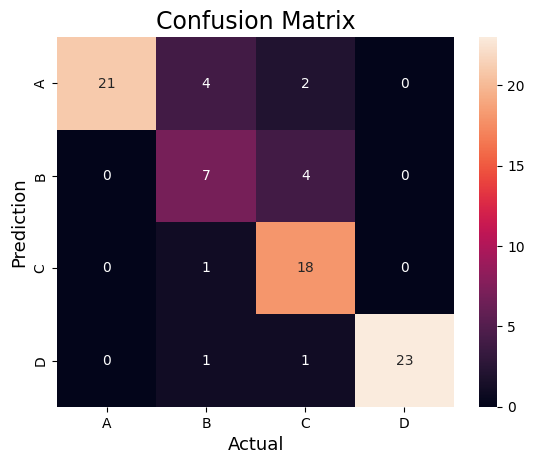

In [ ]:
# the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

#Plot the confusion matrix.
sns.heatmap(cf_matrix,
            annot=True,
            fmt='g',
            xticklabels= ['A','B','C','D'],
            yticklabels= ['A','B','C','D'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:

# Assuming y_true is the true labels and y_pred is the predicted labels
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.8146153846153845
Recall: 0.8203774587985114
F1 Score: 0.8087121212121212
Accuracy: 0.8414634146341463


**LOOCV Classification with Random Forest**


In [ ]:
'''# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

# Create LeaveOneOut cross-validator
loo = LeaveOneOut()

# Lists to store predicted and true labels
y_pred_loo = []
y_true_loo = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train_loo, X_test_loo = X.iloc[train_index], X.iloc[test_index]
    y_train_loo, y_test_loo = np.take(Y, train_index),np.take(Y,test_index)

    # Train the model
    model.fit(X_train_loo, y_train_loo)

    # Make predictions
    y_pred_loo.append(model.predict(X_test_loo)[0])
    y_true_loo.append(y_test_loo[0])

# Calculate accuracy
accuracy_loo = accuracy_score(y_true_loo, y_pred_loo)
print(f'Leave-One-Out Cross-Validation Accuracy: {accuracy_loo:.2f}')'''


"# Create a RandomForestClassifier\nmodel = RandomForestClassifier(n_estimators=100)\n\n# Create LeaveOneOut cross-validator\nloo = LeaveOneOut()\n\n# Lists to store predicted and true labels\ny_pred_loo = []\ny_true_loo = []\n\n# Perform Leave-One-Out Cross-Validation\nfor train_index, test_index in loo.split(X):\n    X_train_loo, X_test_loo = X.iloc[train_index], X.iloc[test_index]\n    y_train_loo, y_test_loo = np.take(Y, train_index),np.take(Y,test_index)\n\n    # Train the model\n    model.fit(X_train_loo, y_train_loo)\n\n    # Make predictions\n    y_pred_loo.append(model.predict(X_test_loo)[0])\n    y_true_loo.append(y_test_loo[0])\n\n# Calculate accuracy\naccuracy_loo = accuracy_score(y_true_loo, y_pred_loo)\nprint(f'Leave-One-Out Cross-Validation Accuracy: {accuracy_loo:.2f}')"

In [ ]:
'''# Save the model as a pickle file
joblib.dump(model, 'LOOCV_Random_Forest_on_tsfresh.pkl')

# Load the model from the file
model = joblib.load('LOOCV_Random_Forest_on_tsfresh.pkl')'''


"# Save the model as a pickle file\njoblib.dump(model, 'LOOCV_Random_Forest_on_tsfresh.pkl')\n\n# Load the model from the file\nmodel = joblib.load('LOOCV_Random_Forest_on_tsfresh.pkl')"

In [ ]:
'''predict_at_index = [*range(0,np.shape(X)[0])]
#predict_at_index = [10,20,30,40,50,60,272]
predict_it = (X.iloc[predict_at_index])
predicted = model.predict(predict_it)
original = list(Y)
print('Predicted',predicted)
print('Original',original)
print('Accuracy',accuracy_score(original,predicted))'''

"predict_at_index = [*range(0,np.shape(X)[0])]\n#predict_at_index = [10,20,30,40,50,60,272]\npredict_it = (X.iloc[predict_at_index])\npredicted = model.predict(predict_it)\noriginal = list(Y)\nprint('Predicted',predicted)\nprint('Original',original)\nprint('Accuracy',accuracy_score(original,predicted))"

In [ ]:
'''#Get the confusion matrix
cf_matrix = confusion_matrix(y_true_loo, y_pred_loo)
print(cf_matrix)

#Plot the confusion matrix.
sns.heatmap(cf_matrix,
            annot=True,
            fmt='g',
            xticklabels= ['A','B','C','D'],
            yticklabels= ['A','B','C','D'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()'''

"#Get the confusion matrix\ncf_matrix = confusion_matrix(y_true_loo, y_pred_loo)\nprint(cf_matrix)\n\n#Plot the confusion matrix.\nsns.heatmap(cf_matrix,\n            annot=True,\n            fmt='g',\n            xticklabels= ['A','B','C','D'],\n            yticklabels= ['A','B','C','D'])\nplt.ylabel('Prediction',fontsize=13)\nplt.xlabel('Actual',fontsize=13)\nplt.title('Confusion Matrix',fontsize=17)\nplt.show()"

**Time Series Forest Classification**

In [ ]:
# data
X_TSF = data.iloc[:,[0,1,2,3]]
Y_TSF = data.iloc[:,4]
X_TSF, Y_TSF

(        A_x ()  A_y ()  A_z ()   id
 0         8444    -108     412    0
 1         8540    -104     532    0
 2         8436    -148     636    0
 3         8516     -84     540    0
 4         8500    -140     500    0
 ...        ...     ...     ...  ...
 272995    8440    -112     596  272
 272996    8620    -116     504  272
 272997    8552    -140     692  272
 272998    8392    -176     556  272
 272999    8760     -76     544  272
 
 [273000 rows x 4 columns],
 0         A
 1         A
 2         A
 3         A
 4         A
          ..
 272995    D
 272996    D
 272997    D
 272998    D
 272999    D
 Name: Label, Length: 273000, dtype: object)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_TSF, Y_TSF, test_size = 0.30)
X_train, X_test, y_train, y_test

(        A_x ()  A_y ()  A_z ()   id
 166646    7932    -168     408  166
 52207     8524    -304     620   52
 3808      7840     112     292    3
 17194     8800    -240     672   17
 111327    8520     144     684  111
 ...        ...     ...     ...  ...
 10189     8636      88     652   10
 269773    8496    -136     580  269
 138119    8196    -536     624  138
 242325    9344     972    1144  242
 12283     8244     124     568   12
 
 [191100 rows x 4 columns],
         A_x ()  A_y ()  A_z ()   id
 77587     8336    -260     360   77
 1237      8500    -124     468    1
 252940    8336    -292     244  252
 191330    8232      64     568  191
 157004    8228     112     760  157
 ...        ...     ...     ...  ...
 192263    8592    -136     528  192
 110702    8764      64     656  110
 132198    8692    -200     688  132
 63800     8576    -628     408   63
 207097    8928    -100     780  207
 
 [81900 rows x 4 columns],
 166646    C
 52207     A
 3808      A
 17194     A
 

In [ ]:
#Time Series Forest Classifier
TSF_model = TimeSeriesForest(random_state=43)

#train the model
TSF_model.fit(X_train, y_train)
TimeSeriesForest(...)
print('Accuracy:',TSF_model.score(X_test, y_test))

Accuracy: 0.9653968253968254


In [ ]:
# Save the model as a pickle file
joblib.dump(TSF_model, 'Time_Series_Forest.pkl')

# Load the model from the file
TSF_model= joblib.load('Time_Series_Forest.pkl')


In [ ]:
predict_at_index = [*range(0,np.shape(X_test)[0])]
#predict_at_index = [10,20,30,40,50,60]
predict_it = (X_test.iloc[predict_at_index])
predicted = TSF_model.predict(predict_it)
original = list(y_test.iloc[predict_at_index])
print('Predicted',predicted)
print('Original',original)
print('Accuracy',accuracy_score(original,predicted))

Predicted ['B' 'A' 'D' ... 'C' 'A' 'D']
Original ['B', 'A', 'D', 'C', 'C', 'C', 'B', 'D', 'C', 'C', 'B', 'C', 'A', 'A', 'C', 'C', 'B', 'A', 'B', 'D', 'C', 'A', 'C', 'D', 'A', 'D', 'B', 'C', 'A', 'C', 'D', 'C', 'D', 'C', 'D', 'B', 'B', 'B', 'C', 'B', 'D', 'A', 'A', 'B', 'C', 'A', 'D', 'D', 'C', 'C', 'C', 'A', 'C', 'B', 'A', 'C', 'D', 'C', 'D', 'C', 'A', 'B', 'C', 'B', 'D', 'A', 'C', 'A', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C', 'D', 'D', 'A', 'B', 'D', 'C', 'A', 'A', 'C', 'A', 'C', 'D', 'A', 'A', 'A', 'B', 'D', 'D', 'D', 'D', 'B', 'D', 'D', 'A', 'A', 'D', 'B', 'C', 'D', 'A', 'C', 'D', 'D', 'B', 'A', 'D', 'C', 'A', 'D', 'D', 'D', 'C', 'C', 'C', 'A', 'D', 'A', 'B', 'D', 'B', 'D', 'A', 'B', 'B', 'C', 'D', 'C', 'C', 'A', 'C', 'C', 'A', 'D', 'D', 'D', 'A', 'C', 'A', 'C', 'A', 'C', 'C', 'D', 'B', 'D', 'D', 'D', 'A', 'B', 'B', 'A', 'B', 'A', 'C', 'D', 'A', 'C', 'C', 'D', 'B', 'D', 'B', 'A', 'D', 'D', 'D', 'A', 'C', 'D', 'A', 'C', 'A', 'D', 'C', 'C', 'A', 'B', 'C', 'D', 'D', 'B', 'A', 'A', 'D', 

[[21685   509    19    17]
 [  361 13593   384    28]
 [    3   326 21602   550]
 [    1     1   635 22186]]


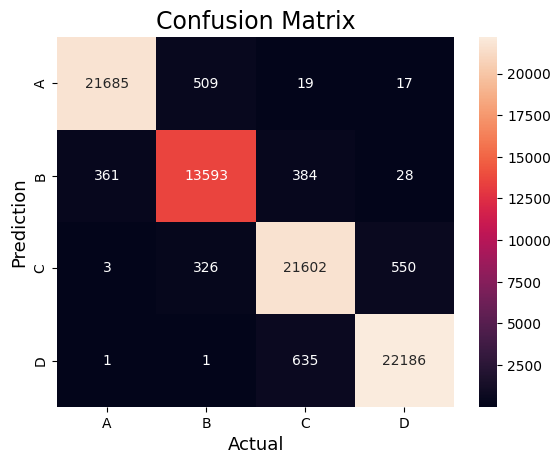

In [ ]:

#Get the confusion matrix
cf_matrix = confusion_matrix(original,predicted)
print(cf_matrix)

#Plot the confusion matrix.
sns.heatmap(cf_matrix,
            annot=True,
            fmt='g',
            xticklabels= ['A','B','C','D'],
            yticklabels= ['A','B','C','D'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:

# Assuming y_true is the true labels and y_pred is the predicted labels
precision = precision_score(original,predicted,average='macro')
recall = recall_score(original,predicted,average='macro')
f1 = f1_score(original,predicted,average='macro')
accuracy = accuracy_score(original,predicted)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.9633853814841219
Recall: 0.963666463516653
F1 Score: 0.9635175674957899
Accuracy: 0.9653968253968254
